#### **Test the BERTopic modeling**

Understanding BERTopic: <br />
1) Get Embeddings
2) Dimensionality reduction
3) Clustering: HDBSCAN. Each cluster is a single docucment, c-TF-IDF is calculated for each word which represents the importance of word in the document. By taking top 10 most important word in each cluster, we would get a good representaation of a cluster and thereby atopic.
4) Topic reduction

Source: 
https://medium.com/towards-data-science/topic-modeling-with-bert-779f7db187e6
https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing#scrollTo=Q9paNa09d3Xy

https://medium.com/atoti/topic-modeling-on-twitter-using-sentence-bert-8acdad958eb1


##### Evaluation

Source: https://towardsdatascience.com/evaluate-topic-model-in-python-latent-dirichlet-allocation-lda-7d57484bb5d0

Eye Balling Models:
1) Top N words
2) Topics/Documents

Intrinsic Evaluation Metrics
1) Capturing model semantics
2) Topics interpretability

Human Judgements
1) What is a topic

Perplexity:
Perplexity is an evalutaion metric for langauge model evaluation. It captures how surprised a model is of new data it has not seen before and is measured as the normalized log-likelihood of held-out test set.

Topic Coherence score: 
Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic.

In [3]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  
                          remove=('headers', 'footers', 'quotes'))['data']

In [27]:
# docs

In [4]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", 
                       calculate_probabilities=True,
                       verbose=True)
topics, probs = topic_model.fit_transform(docs)

/N/slate/potem/miniconda3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/N/slate/potem/miniconda3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/N/slate/potem/miniconda3/lib/python3.10/site-packages/umap/distances.py:1086: NumbaDepr

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

2023-06-14 11:29:52,671 - BERTopic - Clustered reduced embeddings


In [5]:
freq = topic_model.get_topic_info(); freq.head(5)

Topic  Count                           Name  \
0     -1   6899               -1_to_the_and_of   
1      0   1821           0_game_team_games_he   
2      1    641  1_key_clipper_chip_encryption   
3      2    530          2_ites_hello_cheek_hi   
4      3    322    3_israel_israeli_arab_arabs   

                                      Representation  \
0     [to, the, and, of, is, for, you, in, it, that]   
1  [game, team, games, he, players, season, hocke...   
2  [key, clipper, chip, encryption, keys, governm...   
3  [ites, hello, cheek, hi, yep, huh, ken, why, t...   
4  [israel, israeli, arab, arabs, jews, palestini...   

                                 Representative_Docs  
0  [It's like refusing 'God's kingdom come'.\n\nI...  
1  [The FLYERS team that can beat any team on any...  
2  [The following document summarizes the Clipper...  
3  [\n \n                                        ...  
4  [\n\n"Assuming"? Also: come on, Brad. If we ar...

In [6]:
topic_model.get_topic(0)

[('game', 0.010283120382602411),
 ('team', 0.008964034472418638),
 ('games', 0.007123351106261207),
 ('he', 0.0069462096391532824),
 ('players', 0.006295854341914299),
 ('season', 0.006215060781949649),
 ('hockey', 0.006080274372087089),
 ('play', 0.005747085794710098),
 ('25', 0.005606632334227288),
 ('year', 0.0055726834611707216)]

In [7]:
topic_model.topics_[:10]

[0, -1, 15, 32, 116, 127, 74, 0, 0, -1]

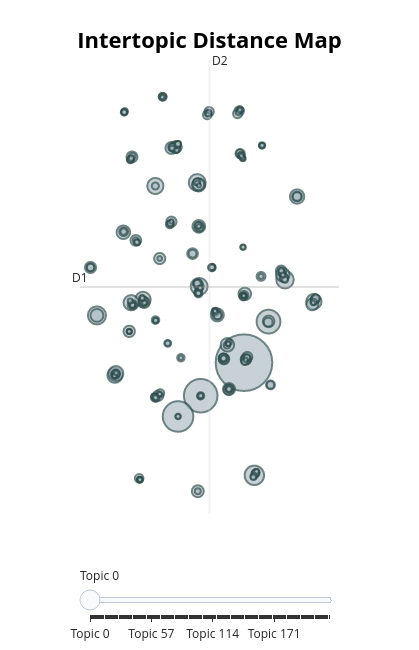

In [8]:
topic_model.visualize_topics()

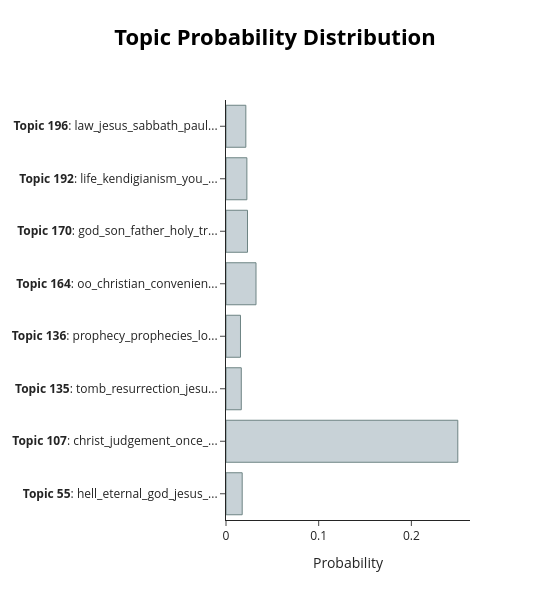

In [9]:
topic_model.visualize_distribution(probs[200],
                                   min_probability=0.015)

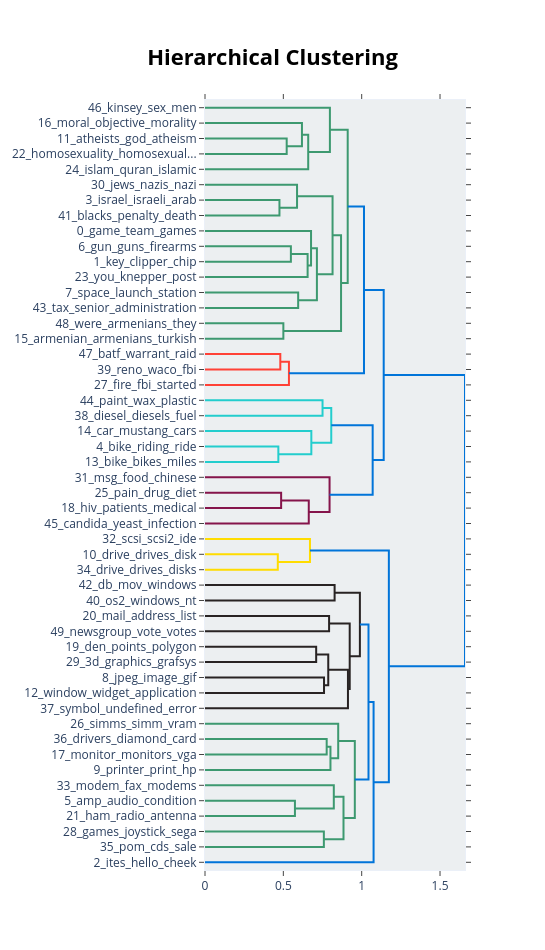

In [10]:
topic_model.visualize_hierarchy(top_n_topics=50)

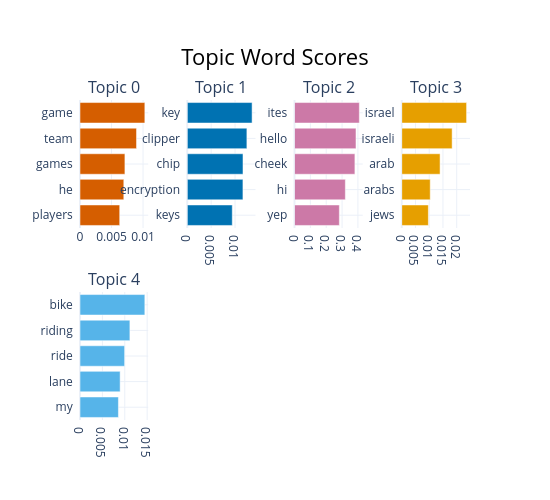

In [11]:
topic_model.visualize_barchart(top_n_topics=5)

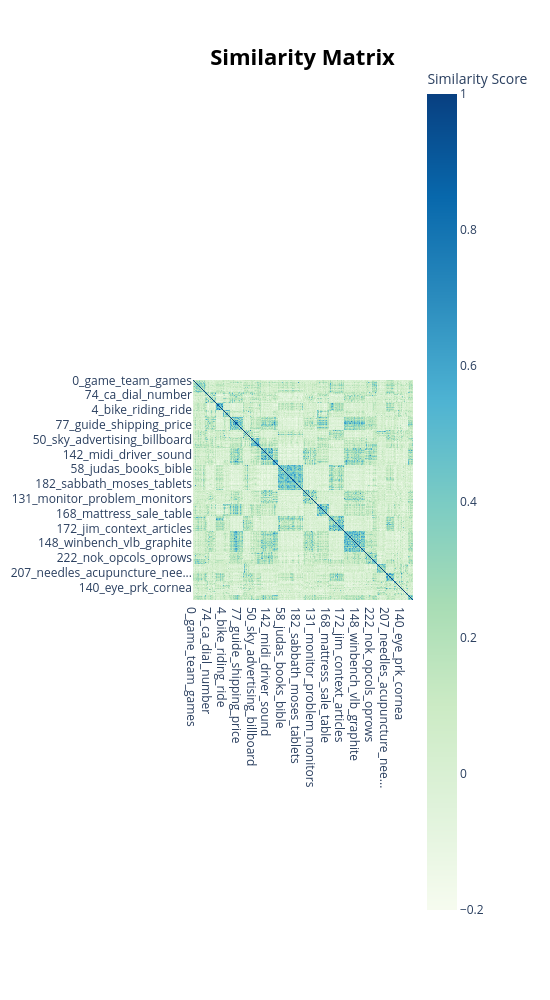

In [12]:
topic_model.visualize_heatmap(n_clusters=20,
                              width=1000,
                              height=1000
                             )

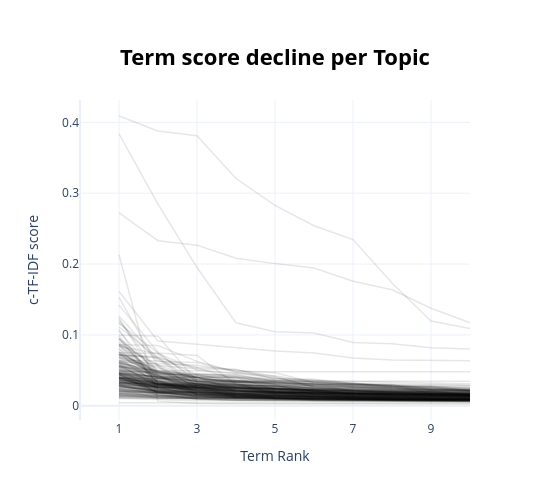

In [13]:
topic_model.visualize_term_rank()

In [14]:
topic_model.update_topics(docs, n_gram_range=(1, 2))

In [15]:
topic_model.get_topic(0)   # We select topic that we viewed before

[('game', 0.00653683526480578),
 ('team', 0.005590598119777413),
 ('he', 0.005225890892210504),
 ('games', 0.004397952826764443),
 ('the', 0.003921183112817738),
 ('players', 0.003791905153320851),
 ('season', 0.0037416995135121332),
 ('was', 0.003722473196464996),
 ('hockey', 0.0036503790353803888),
 ('year', 0.0036034030786641995)]

In [16]:
topic_model.reduce_topics(docs, nr_topics=60)

2023-06-14 15:36:25,298 - BERTopic - Reduced number of topics from 224 to 60


In [18]:
# Access the newly updated topics with:
# print(topic_model.topics_)

In [19]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

[3, 10, 0, 23, 7]

In [23]:
topic_model.get_topic(5)

[('hello', 0.30102663027913534),
 ('ites yep', 0.2967772345970369),
 ('hello ites', 0.2967772345970369),
 ('ken huh', 0.2967772345970369),
 ('why hello', 0.2967772345970369),
 ('huh too', 0.2967772345970369),
 ('hi ken', 0.2967772345970369),
 ('hi hello', 0.2967772345970369),
 ('many hi', 0.2967772345970369),
 ('each why', 0.2967772345970369)]

In [24]:
topic_model.save("my_model")

/N/slate/potem/miniconda3/lib/python3.10/site-packages/scipy/sparse/_index.py:146: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.

